# Guangzhou speed data prediction and imputation using LSTM regularized matrix factorization

## Data Organization: Matrix Structure

We consider a dataset of $m$ discrete time series $\boldsymbol{y}_{i}\in\mathbb{R}^{f},i\in\left\{1,2,...,m\right\}$. The time series may have missing elements. We express spatio-temporal dataset as a matrix $Y\in\mathbb{R}^{m\times f}$ with $m$ rows (e.g., locations) and $f$ columns (e.g., discrete time intervals),

$$Y=\left[ \begin{array}{cccc} y_{11} & y_{12} & \cdots & y_{1f} \\ y_{21} & y_{22} & \cdots & y_{2f} \\ \vdots & \vdots & \ddots & \vdots \\ y_{m1} & y_{m2} & \cdots & y_{mf} \\ \end{array} \right]\in\mathbb{R}^{m\times f}.$$

## Temporal Regularized Matrix Factorization(TRMF)
>**Reference**: Hsiang-Fu Yu, Nikhil Rao, Inderjit S. Dhillon, 2016. [*Temporal regularized matrix factorization for high-dimensional time series prediction*](http://www.cs.utexas.edu/~rofuyu/papers/tr-mf-nips.pdf). 30th Conference on Neural Information Processing Systems (*NIPS 2016*), Barcelona, Spain.

Temporal Regularized Matrix Factorization (TRMF) framework is an approach to incorporate temporal dependencies into matrix factorization models which use well-studied time series models to describe temporal dependencies
among ${\boldsymbol{x}_t}$ explicitly.Such models take the form:

$$\boldsymbol{x}_{t}\approx\sum_{l\in\mathcal{L}}\boldsymbol{\theta}_{l}\circledast\boldsymbol{x}_{t-l}$$

where this Long Short Term Memory Network(LSTM) is specialized by a lag set $\mathcal{L}=\left\{l_1,l_2,...,l_d\right\}$ (e.g., $\mathcal{L}=\left\{1,2,144\right\}$) and weights $\boldsymbol{\theta}_{l}\in\mathbb{R}^{r},\forall l$, and we further define

$$\mathcal{R}_{AR}\left(X\mid X^*,\mathcal{L},\eta\right)=\frac{1}{2}\sum_{t=1}^{f}\left(\boldsymbol{x}_{t}-\boldsymbol{x}_{t}^*\right)^T\left(\boldsymbol{x}_{t}-\boldsymbol{x}_{t}^*\right)+\frac{\eta}{2}\sum_{t=1}^{f}\boldsymbol{x}_{t}^T\boldsymbol{x}_{t}.$$

Thus, TRMF-LSTM is given by solving

$$\min_{W,X}\frac{1}{2}\underbrace{\sum_{(i,t)\in\Omega}\left(y_{it}-\boldsymbol{w}_{i}^T\boldsymbol{x}_{t}\right)^2}_{\text{sum of squared residual errors}}+\lambda_{w}\underbrace{\mathcal{R}_{w}\left(W\right)}_{W-\text{regularizer}}+\lambda_{x}\underbrace{\mathcal{R}_{LSTM}\left(X\mid X^*,\mathcal{L},\eta\right)}_{\text{LSTM-regularizer}}$$

where 
$$\mathcal{R}_{w}\left(W\right)=\frac{1}{2}\sum_{i=1}^{m}\boldsymbol{w}_{i}^T\boldsymbol{w}_{i}$$

and
$$
x_t^* = \left\{
\begin{array}{ll}
0 &, t <= l_d \\
\text{LSTM}(x_{t-l} \mid l \in \mathcal{L}) & , t> l_d
\end{array} \right.
$$

## Solving the above minimization problem using alternative least square method(ALS)

### Least square for temporal embedding X
To update temporal embedding X, we need to solve the following sub-problem.
$$\min_{\boldsymbol{x}_t} f_X(\boldsymbol{x}_t) = \min_{x_t}\frac{1}{2}\sum_{i:(i,t)\in\Omega}\left(y_{it}-\boldsymbol{w}_{i}^\top\boldsymbol{x}_{t}\right)^2+\frac{\lambda_{x}}{2}\left(\boldsymbol{x}_{t}-\boldsymbol{x}_{t}^*\right)^\top\left(\boldsymbol{x}_{t}-\boldsymbol{x}_{t}^*\right)+\frac{\lambda_{x} \eta}{2}\boldsymbol{x}_{t}^T\boldsymbol{x}_{t}$$

Rewrite the above objective function as follows:
$$
f_X(\boldsymbol{x}_t) = \frac{1}{2}\sum_{i:(i,t)\in\Omega}(y_{it} - \boldsymbol{w}_i^\top\boldsymbol{x}_t)^\top(y_{it} - \boldsymbol{w}_i^\top\boldsymbol{x}_t) + \frac{\lambda_{x}}{2}\left(\boldsymbol{x}_{t}-\boldsymbol{x}_{t}^*\right)^\top\left(\boldsymbol{x}_{t}-\boldsymbol{x}_{t}^*\right)+\frac{\lambda_{x} \eta}{2}\boldsymbol{x}_{t}^\top\boldsymbol{x}_{t}
$$

Expand the objective function $f_X(\boldsymbol{x}_t)$ as:
$$
f_X(\boldsymbol{x}_t) = \frac{1}{2}\sum_{i:(i,t)\in\Omega}\biggl(\boldsymbol{x}_t^\top\boldsymbol{w}_i\boldsymbol{w}_i^\top\boldsymbol{x}_t - 2y_{it}\boldsymbol{w}_i^\top\boldsymbol{x}_t\biggr) + \frac{\lambda_x}{2}\biggl(\boldsymbol{x}_t^\top\boldsymbol{x}_t - 2\boldsymbol{x}_t^{*\top}\boldsymbol{x}_t\biggr) + \frac{\lambda_x \eta}{2}\boldsymbol{x}_t^\top\boldsymbol{x}_t + \text{const}
$$

The above equation can be rewitten as:
$$
\begin{aligned}
f_X(\boldsymbol{x}_t) &= \frac{1}{2}\boldsymbol{x}_t^\top\biggl(\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top \biggr)\boldsymbol{x}_t - \sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i^\top\boldsymbol{x}_t + \boldsymbol{x}_t^\top \biggl(\frac{\lambda_x}{2}I\biggr)\boldsymbol{x}_t - \lambda_x \boldsymbol{x}_t^{*\top}\boldsymbol{x}_t + \boldsymbol{x}_t^{\top}\biggl(\frac{\lambda_x\eta}{2}I\biggr)\boldsymbol{x}_t + \text{const} \\
~& = \boldsymbol{x}_t^\top\biggl(\frac{1}{2}\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top + \frac{\lambda_x}{2}I+\frac{\lambda_x\eta}{2}I\biggr)\boldsymbol{x}_t - \biggl(\sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i + \lambda_x \boldsymbol{x}_t^*\biggr)^\top\boldsymbol{x}_t + const
\end{aligned}
$$

Derive the deviation of $f_X(\boldsymbol{x}_t)$ as follows:
$$
f_X'(\boldsymbol{x}_t) = \biggl(\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top + \lambda_xI+\lambda_x\eta I \biggr)\boldsymbol{x}_t - \biggl(\sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i + \lambda_x \boldsymbol{x}_t^* \biggr)
$$

Let the derivation equal zero, we can derive the updating equation of $\boldsymbol{x}_t$ as follows:
<span style='color: blue'>
$$\boldsymbol{x}_t = \biggl(\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top + \lambda_xI+\lambda_x\eta I \biggr)^{-1}\biggl(\sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i + \lambda_x \boldsymbol{x}_t^* \biggr)$$
</span>

# Long-short Term Memory(LSTM)
LSTM is actually also a special kind of neural network. The major difference between LSTM and RNN is that LSTM has a special mechanism called **forget gate**. As RNNs do, LSTMs also have **hidden state** that would pass to the next time slot. But not like RNN, iformations are selected through the forget gate and only let through those informations that is usefull. Let see how this would help LSTM get away from gradient vanish or gradient explode.

### Input gate in LSTM
First, the input is squashed between -1 and 1 using a tanh activation function. This can be expressed by:

$$g = tanh(b^g+x_tU^g+y_{t-1}V^g)$$

Where **$U^g$** and **$V^g$** are the weights for the input and previous cell output, respectively, and **$b^g$** is the input bias. Note that the exponents **g** are not a raised power, but rather signify that these are the input weights and bias values (as opposed to the input gate, forget gate, output gate etc.).

This squashed input is then multiplied element-wise by the output of the input gate. The input gate is basically a hidden layer of sigmoid activated nodes, with weighted **$x_t$** and **$y_{t-1}$** input values, which outputs values of between 0 and 1 and when multiplied element-wise by the input determines which inputs are switched on and off. In other words, it is a kind of input filter or gate. The expression for the input gate is:

$$i = \sigma(b^i + x_tU^i+ y_{t-1}V^i)$$

### The hidden state and the forget gate
Forget gate is again a sigmoid activated set of nodes which is element-wise multiplied by the hidden state of the previous moment **$s_{t-1}$** to determine which previous states should be remembered (i.e. forget gate output close to 1) and which should be forgotten (i.e. forget gate output close to 0). This allows the LSTM cell to learn appropriate context. The forget gate is like:

$$f = \sigma(b^f + x_tU^f + y_{t-1}V^i)$$

So the hidden state of the current moment is:

$$s_t = s_{t-1}\circ f + g \circ i$$

Where $\circ$ denotes element-wise multiplication.

### The output gate in LSTM

The final stage of the LSTM cell is the output gate. The output gate has two components – another tanh squashing function and an output sigmoid gating function. The output sigmoid gating function, like the other gating functions in the cell, is multiplied by the squashed state st to determine which values of the state are output from the cell. 

The output gate is like:

$$o = \sigma(b^o + x_tU^o + y_{t-1}V^o)$$

So the final output of the cell is:

$$y_t = tanh(s_t)\circ o$$

In [1]:
import numpy as np
import scipy.io
from numpy.linalg import inv as inv
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import time

Using TensorFlow backend.


## Matrix Computation Concepts

### Kronecker product

- **Definition**:

Given two matrices $A\in\mathbb{R}^{m_1\times n_1}$ and $B\in\mathbb{R}^{m_2\times n_2}$, then, the **Kronecker product** between these two matrices is defined as

$$A\otimes B=\left[ \begin{array}{cccc} a_{11}B & a_{12}B & \cdots & a_{1m_2}B \\ a_{21}B & a_{22}B & \cdots & a_{2m_2}B \\ \vdots & \vdots & \ddots & \vdots \\ a_{m_11}B & a_{m_12}B & \cdots & a_{m_1m_2}B \\ \end{array} \right]$$
where the symbol $\otimes$ denotes Kronecker product, and the size of resulted $A\otimes B$ is $(m_1m_2)\times (n_1n_2)$ (i.e., $m_1\times m_2$ columns and $n_1\times n_2$ rows).

- **Example**:

If $A=\left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \\ \end{array} \right]$ and $B=\left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10 \\ \end{array} \right]$, then, we have

$$A\otimes B=\left[ \begin{array}{cc} 1\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] & 2\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] \\ 3\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] & 4\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] \\ \end{array} \right]$$

$$=\left[ \begin{array}{cccccc} 5 & 6 & 7 & 10 & 12 & 14 \\ 8 & 9 & 10 & 16 & 18 & 20 \\ 15 & 18 & 21 & 20 & 24 & 28 \\ 24 & 27 & 30 & 32 & 36 & 40 \\ \end{array} \right]\in\mathbb{R}^{4\times 6}.$$

### Khatri-Rao product (`kr_prod`)

- **Definition**:

Given two matrices $A=\left( \boldsymbol{a}_1,\boldsymbol{a}_2,...,\boldsymbol{a}_r \right)\in\mathbb{R}^{m\times r}$ and $B=\left( \boldsymbol{b}_1,\boldsymbol{b}_2,...,\boldsymbol{b}_r \right)\in\mathbb{R}^{n\times r}$ with same number of columns, then, the **Khatri-Rao product** (or **column-wise Kronecker product**) between $A$ and $B$ is given as follows,

$$A\odot B=\left( \boldsymbol{a}_1\otimes \boldsymbol{b}_1,\boldsymbol{a}_2\otimes \boldsymbol{b}_2,...,\boldsymbol{a}_r\otimes \boldsymbol{b}_r \right)\in\mathbb{R}^{(mn)\times r}$$
where the symbol $\odot$ denotes Khatri-Rao product, and $\otimes$ denotes Kronecker product.

- **Example**:

If $A=\left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \\ \end{array} \right]=\left( \boldsymbol{a}_1,\boldsymbol{a}_2 \right) $ and $B=\left[ \begin{array}{cc} 5 & 6 \\ 7 & 8 \\ 9 & 10 \\ \end{array} \right]=\left( \boldsymbol{b}_1,\boldsymbol{b}_2 \right) $, then, we have

$$A\odot B=\left( \boldsymbol{a}_1\otimes \boldsymbol{b}_1,\boldsymbol{a}_2\otimes \boldsymbol{b}_2 \right) $$

$$=\left[ \begin{array}{cc} \left[ \begin{array}{c} 1 \\ 3 \\ \end{array} \right]\otimes \left[ \begin{array}{c} 5 \\ 7 \\ 9 \\ \end{array} \right] & \left[ \begin{array}{c} 2 \\ 4 \\ \end{array} \right]\otimes \left[ \begin{array}{c} 6 \\ 8 \\ 10 \\ \end{array} \right] \\ \end{array} \right]$$

$$=\left[ \begin{array}{cc} 5 & 12 \\ 7 & 16 \\ 9 & 20 \\ 15 & 24 \\ 21 & 32 \\ 27 & 40 \\ \end{array} \right]\in\mathbb{R}^{6\times 2}.$$

In [2]:
def kr_prod(a, b):
    return np.einsum('ir, jr -> ijr', a, b).reshape(a.shape[0] * b.shape[0], -1)

In [3]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8], [9, 10]])
print(kr_prod(A, B))

[[ 5 12]
 [ 7 16]
 [ 9 20]
 [15 24]
 [21 32]
 [27 40]]


### Load the Guangzhou speed data
Shanghai pollutant concentration dataset is stored in a 214 by 8784 tensor `dense_tensor`.
- **214** stands for 214 roads in Guangzhou.
- **8784** stands for 8784 5 mins time slots.

Though the data set have already been through an imputation process by `TRMF`, the data is still not complete because there is no observation of certain pollutant in some stations. The following table shows the observations in Pudong Dongfanglu observation station.

In [2]:
import scipy.io

tensor = scipy.io.loadmat('../Guangzhou-data-set/tensor.mat')
tensor = tensor['tensor']
random_matrix = scipy.io.loadmat('../Guangzhou-data-set/random_matrix.mat')
random_matrix = random_matrix['random_matrix']
random_tensor = scipy.io.loadmat('../Guangzhou-data-set/random_tensor.mat')
random_tensor = random_tensor['random_tensor']

dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0.0

# =============================================================================
### Random missing (RM) scenario
### Set the RM scenario by:
binary_mat = np.round(random_tensor + 0.5 - missing_rate).reshape([random_tensor.shape[0], 
                                                                   random_tensor.shape[1] 
                                                                   * random_tensor.shape[2]])
# =============================================================================

# =============================================================================
### Non-random missing (NM) scenario
### Set the NM scenario by:
# binary_tensor = np.zeros(tensor.shape)
# for i1 in range(tensor.shape[0]):
#     for i2 in range(tensor.shape[1]):
#         binary_tensor[i1,i2,:] = np.round(random_matrix[i1,i2] + 0.5 - missing_rate)
# binary_mat = binary_tensor.reshape([binary_tensor.shape[0], binary_tensor.shape[1] 
#                                     * binary_tensor.shape[2]])
# =============================================================================

sparse_mat = np.multiply(dense_mat, binary_mat)

### Temporal embedding normalize
Before we feed the raw data into the LSTM network, we need to normalize those inputs and their labels to standard normal distribution as follows:

$$\hat{x}_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}$$

The same $x_{max}$ and $x_{min}$ will be used again to restore the scale and position of predictions.

$$x_i = \hat{x}_i \times (x_{max} - x_{min}) + x_{min}$$

Since the concentrarion data scale of different pollutants observed from different stations are quite different, so they are scaled seperately using sklearn tool `MinMaxScalar`. `MinMaxScalar` is used to conveniently calculate the `min` and `max` of each feature of inital data `X` of size **[sample_num, feature_num]**. ($x_{max}$ and $x_{min}$ are calculated for each feature seperately)

Our temporal embedding `X` is a **time steps** by **rank** matrix. Here, we can see it as a dataset of **time steps** samples(time slots) and each sample contains **rank** features(pollutants in different locations). So the data scaling can be done as:

In [5]:
def scalergenerator(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(X)
    return scaler

X = 100 * np.random.rand(1000, 50)
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_scale = scaler.fit_transform(X)
print(X[0,:10])
scaler = scalergenerator(X)
rshpX = X[:5,:]
print(rshpX.shape)
xx = scaler.transform(rshpX)
print(xx.shape)
# print(xx[:10])
xx_descale = scaler.inverse_transform(xx[0].reshape(1, -1))[0]
print(xx_descale.shape)
print(xx_descale[:10])

[32.94325011 73.21629129 87.15318225 75.91872858 74.42248277 77.22266207
 26.70174546 39.55343913 24.06208277 51.80702553]
(5, 50)
(5, 50)
(50,)
[32.94325011 73.21629129 87.15318225 75.91872858 74.42248277 77.22266207
 26.70174546 39.55343913 24.06208277 51.80702553]


## Problem setting
This work mainly focuses on two tasks: missing data imputation and data prediction. Missing data imputation is utilizing history data to complete missing observations. We can use the frame work of Temporal Regularized Matrix Factorization to tackle these two problem at the same time.

### Creating training set and test set

In [6]:
test_rate = 0.3

train_len = int((1 - test_rate) * sparse_mat.shape[1])
test_len = sparse_mat.shape[1] - train_len
training_set = sparse_mat[:, :train_len]
test_set = sparse_mat[:, train_len:]
print('The size of training set is:')
print(training_set.shape)
print()
print('The size of test set is:')
print(test_set.shape)

The size of training set is:
(214, 6148)

The size of test set is:
(214, 2636)


In [7]:
training_ground_truth = dense_mat[:, :train_len]
test_ground_truth = dense_mat[:, train_len:]
print('The size of training set ground truth is:')
print(training_ground_truth.shape)
print()
print('The size of test set ground truth is:')
print(test_ground_truth.shape)

The size of training set ground truth is:
(214, 6148)

The size of test set ground truth is:
(214, 2636)


## Using training set to train TRMF spatial temporal embeddings and AR coefficients

In [12]:
def create_lstm_samples(dataset, time_lags):
    dataX, dataY = [], []
    for t in range(dataset.shape[0] - np.max(time_lags)):
        a = dataset[t + np.max(time_lags) - time_lags, :]
        dataX.append(a)
        dataY.append(dataset[t + np.max(time_lags), :])
    return np.array(dataX), np.array(dataY)

In [13]:
def lstmmodel(rank, lag_len):
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(200, input_shape = (lag_len, rank), return_sequences = True))
#     model.add(Dropout(0.1))
    model.add(LSTM(200, input_shape = (lag_len, 200), return_sequences = True))
#     model.add(Dropout(0.1))
    model.add(LSTM(200, input_shape = (lag_len, 200)))
    model.add(Dropout(0.1))
    model.add(Dense(rank))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [17]:
def TRMF(sparse_mat, init, time_lags, lambda_w, lambda_x, eta, maxiter):
    W = init["W"]
    X = init["X"]
    dim1, dim2 = sparse_mat.shape
    binary_mat = np.zeros((dim1,dim2))
    position = np.where((sparse_mat != 0))
    binary_mat[position] = 1
    d = len(time_lags)
    max_lags = np.max(time_lags)
    r = X.shape[1]
    model = lstmmodel(r, d)
    start_time = time.time()
    for iter in range(maxiter):
        var1 = X.T                       # Update spatial embedding W
        var2 = kr_prod(var1,var1)
        var3 = np.matmul(var2,binary_mat.T)
        var4 = np.matmul(var1,sparse_mat.T)
        for i in range(dim1):
            W[i,:] = np.matmul(inv((var3[:,i].reshape([r,r]))+lambda_w * np.eye(r)), var4[:,i]) 
        var1 = W.T                       #Update temporal embedding X
        var2 = kr_prod(var1,var1)
        var3 = np.matmul(var2, binary_mat)
        var4 = np.matmul(var1, sparse_mat)
        for t in range(dim2):
            if t < max_lags or iter == 0:
                X[t, :] = np.matmul(inv(var3[:, t].reshape([r,r]) + lambda_x * eta * np.eye(r)), var4[:, t])
            else:
                X_hat = X[t - time_lags, :].copy()
                X_hat_scale = scaler.transform(X_hat)[np.newaxis, :, :]
                Qt_scale =  model.predict(X_hat_scale)
                Qt = scaler.inverse_transform(Qt_scale)[0]
                X[t, :] = np.matmul(inv(var3[:, t].reshape([r,r])
                                           + lambda_x * np.eye(r) + lambda_x * eta * np.eye(r)),
                                       (var4[:, t] + lambda_x * Qt))
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_scale = scaler.fit_transform(X)
        lstmX, lstmY = create_lstm_samples(X_scale, time_lags)        # Train LSTM
        model.fit(lstmX, lstmY, epochs=10, batch_size=10, verbose=0)  
        mat_hat = np.matmul(W, X.T)
        if (iter + 1) % 50 == 0:
            print('Iterations: %d, time cost: %ds'%((iter + 1), (time.time() - start_time)))
            start_time = time.time()
            print()
    model.save('model_save\lstm_trained1.h5')
    return W, X, model, scaler

**W** is spatial embedding, **X** is temporal embedding and $\text{theta}$ is AR coefficient.

In [18]:
rank = 50
maxiter = 200
lambda_w = 50
lambda_x = 50
eta = 0.03
time_lags = np.array([1, 2, 144])
dim1, dim2 = training_set.shape
init = {"W": 0.1 * np.random.rand(dim1, rank), "X": 0.1 * np.random.rand(dim2, rank)}
W, X, model, scaler = TRMF(training_set, init, time_lags, 
                   lambda_w, lambda_x, eta, maxiter)

Iterations: 50, time cost: 7869s

Iterations: 100, time cost: 7849s

Iterations: 150, time cost: 7845s

Iterations: 200, time cost: 7888s



In [19]:
print(np.max(X))
print(np.min(X))

4.519984013689665
-4.014090578471714


### Online forecasting with TRMF
In the context of temporal sequence online forecasting, TRMF takes current observations $y_t$ to train the temporal embedding $x_t$. Then, TRMF use $x_{t - \text{time_lags}}$ temporal embeddings to make forecast of future temporal embedding $x_{t+1}$. Finally, forecasted temporal embdding $x_{t+1}$ will be multiplied by spatial embedding W to calculate future speed data.

Utilize pre-trained spatial embedding **W** of size [27, rank], pre-trained AR coefficients **theta**, prestep temporal embedding **X0** of size [max(time_lags), rank] and observations(may be incomplete) to make predictions of the next time step.

In [20]:
def OnlineTRMF(sparse_vec, init, lambda_x, time_lags):
    W = init["W"]
    X = init["X"]
    model = init["model"]
    scaler = init["scaler"]
    dim = sparse_vec.shape[0]
    t, rank = X.shape
    position = np.where(sparse_vec != 0)
    binary_vec = np.zeros(dim)
    binary_vec[position] = 1
    X_hat = X[t - 1 - time_lags, :].copy()
    X_hat_scale = scaler.transform(X_hat)[np.newaxis, :, :]
    Qt_scale =  model.predict(X_hat_scale)
    Qt = scaler.inverse_transform(Qt_scale)[0]
    var1 = W.T
    var2 = kr_prod(var1, var1)
    var_mu = np.matmul(var1, sparse_vec) + lambda_x * Qt
    inv_var_Lambda = inv(np.matmul(var2, binary_vec).reshape([rank, rank]) + lambda_x * np.eye(rank))
    return np.matmul(inv_var_Lambda, var_mu)

### Prediction on training set and test set

In [23]:
def online_prediction(sparse_mat, init, time_lags, lambda_w, lambda_x, eta, maxiter):
    W = init["W"]
    X = init["X"]
    model = init["model"]
    scaler = init["scaler"]
    pre_step_num = X.shape[0]
    rank = X.shape[1]
    dim1, dim2 = sparse_mat.shape
    X_hat = np.zeros((dim2 + pre_step_num, rank))
    mat_pred = np.zeros((dim1, dim2))
    X_hat[:pre_step_num,:] = X.copy()
    start_time = time.time()
    for t in range(dim2):
        if t == 0:
            X_star = X_hat[pre_step_num + t - time_lags, :].copy()
            X_star_scale = scaler.transform(X_star)[np.newaxis, :, :]
            Qt_scale =  model.predict(X_star_scale)
            Qt = scaler.inverse_transform(Qt_scale)[0]
            X_hat[pre_step_num + t, :] = Qt.copy()
        else:
            sparse_vec = sparse_mat[:, t - 1]
            if np.where(sparse_vec > 0)[0].shape[0] > rank:
                init = {"W": W, "X": X_hat[pre_step_num + t - np.max(time_lags) - 1 : pre_step_num + t, :],
                        "model": model, "scaler": scaler}
                X_c = OnlineTRMF(sparse_vec, init, lambda_x/dim2, time_lags)
                X_hat[pre_step_num + t - 1, :] = X_c.copy()
                X_star = X_hat[pre_step_num + t - time_lags, :].copy()
                X_star_scale = scaler.transform(X_star)[np.newaxis, :, :]
                Qt_scale =  model.predict(X_star_scale)
                Qt = scaler.inverse_transform(Qt_scale)[0]
                X_hat[pre_step_num + t, :] = Qt.copy()
            else:
                X_star = X_hat[pre_step_num + t - time_lags, :].copy()
                X_star_scale = scaler.transform(X_star)[np.newaxis, :, :]
                Qt_scale =  model.predict(X_star_scale)
                Qt = scaler.inverse_transform(Qt_scale)[0]
                X_hat[pre_step_num + t, :] = Qt.copy()
        mat_pred[:, t] = np.matmul(W, X_hat[pre_step_num + t, :])
        if (t + 1) % 1000 == 0:
            print('Time step: %d, time cost: %d s'%((t + 1), (time.time() - start_time)))
            start_time = time.time()
            
    sparse_vec = sparse_mat[:, -1]
    init = {"W": W, "X": X_hat[dim2 + pre_step_num - np.max(time_lags) - 1 : , :], "model": model, "scaler": scaler}
    X_c = OnlineTRMF(sparse_vec, init, lambda_x/dim2, time_lags)
    X_hat[dim2 + pre_step_num - 1,:] = X_c.copy()
    mat_rec = np.matmul(W, X_hat[pre_step_num : , :].T)
    return mat_rec, mat_pred

### Prediction on training set

In [24]:
import time
start_time = time.time()
init = {"W": W, "X": X[:np.max(time_lags) , :], "model": model, "scaler": scaler}
train_mat_rec, train_mat_pred = online_prediction(training_set[:, np.max(time_lags):], init, time_lags
                                     , lambda_w, lambda_x, eta, maxiter)
print('Shape of imputed data is:')
print(train_mat_rec.shape)
print()
print('Shape of predicted data is:')
print(train_mat_pred.shape)

Time step: 1000, time cost: 7 s
Time step: 2000, time cost: 7 s
Time step: 3000, time cost: 7 s
Time step: 4000, time cost: 7 s
Time step: 5000, time cost: 7 s
Time step: 6000, time cost: 7 s
Shape of imputed data is:
(214, 6004)

Shape of predicted data is:
(214, 6004)


### Prediction on test set

In [25]:
import time
start_time = time.time()
init = {"W": W, "X": X[- np.max(time_lags): , :], "model": model, "scaler": scaler}
test_mat_rec, test_mat_pred = online_prediction(test_set, init, time_lags
                                     , lambda_w, lambda_x, eta, maxiter)
print('Shape of imputed data is:')
print(test_mat_rec.shape)
print()
print('Shape of predicted data is:')
print(test_mat_pred.shape)

Time step: 1000, time cost: 7 s
Time step: 2000, time cost: 7 s
Shape of imputed data is:
(214, 2636)

Shape of predicted data is:
(214, 2636)


In [26]:
print('10 first real value on test set')
print(test_mat_pred[0,:10])
print()
print('10 first prediciton on test set:')
print(test_ground_truth[0,:10])

10 first real value on test set
[23.54831659 20.66936936 23.58832583 20.32137219 20.79829047 23.98984255
 24.39003351 23.38475983 21.95886069 24.23457047]

10 first prediciton on test set:
[23.699 28.148 24.213 20.492 22.004 27.448 28.174 25.136 22.754 25.685]


### Calculate the prediction error
RMSE(root mean squared error) for both training set and test set are calculated in the following code:

In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def root_mean_squared_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean(np.square(y_true - y_pred)))
def imputation_mean_absolute_percentage_error(y_true, y_pred, pos): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true[pos] - y_pred[pos]) / y_true[pos])) * 100
def imputation_root_mean_squared_error(y_true, y_pred, pos): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean(np.square(y_true[pos] - y_pred[pos])))

### Prediction error

In [28]:
# calculate prediction error on training set
trainPred_rmse = root_mean_squared_error(training_ground_truth[:, np.max(time_lags):], train_mat_pred)
print('Train prediction RMSE: %.2f RMSE' % (trainPred_rmse))
trainPred_mape = mean_absolute_percentage_error(training_ground_truth[:, np.max(time_lags):], train_mat_pred)
print('Train prediction MAPE: %.2f%% MAPE' % (trainPred_mape))
# calculate prediction error on test set
testPred_rmse = root_mean_squared_error(test_ground_truth, test_mat_pred)
print('Test prediction RMSE: %.2f RMSE' % (testPred_rmse))
testPred_mape = mean_absolute_percentage_error(test_ground_truth, test_mat_pred)
print('Test prediction MAPE: %.2f%% MAPE' % (testPred_mape))

Train prediction RMSE: 4.85 RMSE
Train prediction MAPE: inf% MAPE
Test prediction RMSE: 4.28 RMSE
Test prediction MAPE: 10.24% MAPE


/home/jamie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


### Real value and predicted value visualization

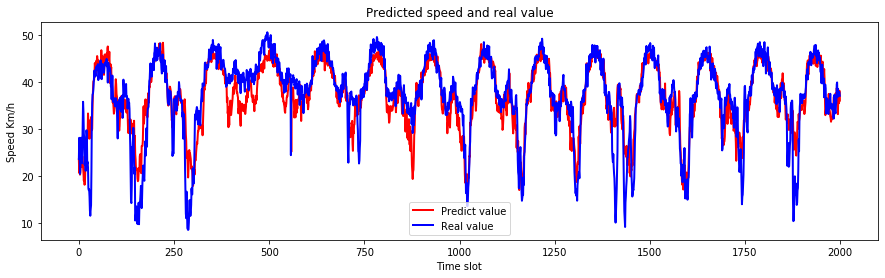

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 4))
road = 0
start_time = 0
end_time = 2000
plt.plot(test_mat_pred[road, start_time:end_time], label = 'Predict value', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=2)
plt.plot(test_ground_truth[road, start_time:end_time], label = 'Real value', marker='', markerfacecolor='blue', markersize=8, color='blue', linewidth=2)
plt.title('Predicted speed and real value')
plt.xlabel('Time slot')
plt.ylabel('Speed Km/h')
plt.legend()
plt.show()

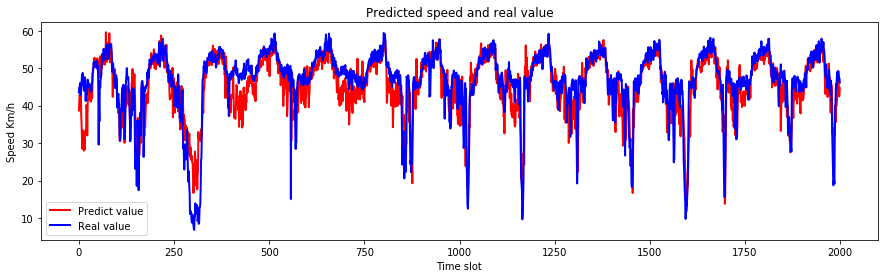

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 4))
road = 1
start_time = 0
end_time = 2000
plt.plot(test_mat_pred[road, start_time:end_time], label = 'Predict value', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=2)
plt.plot(test_ground_truth[road, start_time:end_time], label = 'Real value', marker='', markerfacecolor='blue', markersize=8, color='blue', linewidth=2)
plt.title('Predicted speed and real value')
plt.xlabel('Time slot')
plt.ylabel('Speed Km/h')
plt.legend()
plt.show()

### Imputaion error

In [38]:
train_pred_set = training_set[:, np.max(time_lags):] 
train_pred_ground_truth = training_ground_truth[:, np.max(time_lags):]
pos_train = np.where((train_pred_set == 0) & (train_pred_ground_truth != 0))
pos_test = np.where((test_set == 0) & (test_ground_truth != 0))
# calculate imputation error on training set
trainRec_rmse = imputation_root_mean_squared_error(training_ground_truth[:, np.max(time_lags):], train_mat_rec, pos_train)
print('Train imputation RMSE: %.2f RMSE' % (trainRec_rmse))
trainRec_mape = imputation_mean_absolute_percentage_error(training_ground_truth[:, np.max(time_lags):], train_mat_rec, pos_train)
print('Train imputation MAPE: %.2f%% MAPE' % (trainRec_mape))
# calculate imputation error on test set
testRec_rmse = imputation_root_mean_squared_error(test_ground_truth, test_mat_rec, pos_test)
print('Test imputation RMSE: %.2f RMSE' % (testRec_rmse))
testRec_mape = imputation_mean_absolute_percentage_error(test_ground_truth, test_mat_rec, pos_test)
print('Test imputation MAPE: %.2f%% MAPE' % (testRec_mape))

Train imputation RMSE: nan RMSE
Train imputation MAPE: nan% MAPE
Test imputation RMSE: nan RMSE
Test imputation MAPE: nan% MAPE


In [40]:
print(pos_train)
print(pos_test)

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


### Real value and predicted value visualization

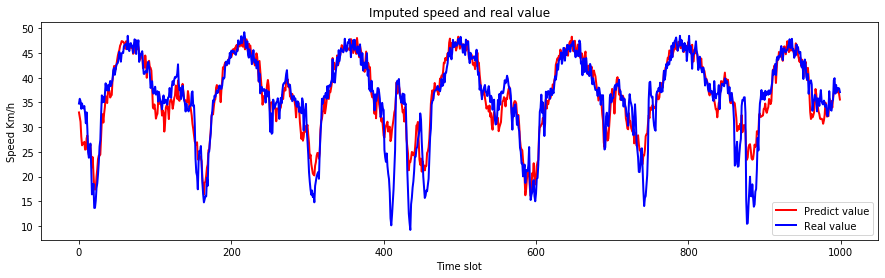

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 4))
road = 0
start_time = 1000
end_time = 2000
plt.plot(test_mat_rec[road, start_time:end_time], label = 'Predict value', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=2)
plt.plot(test_ground_truth[road, start_time:end_time], label = 'Real value', marker='', markerfacecolor='blue', markersize=8, color='blue', linewidth=2)
plt.title('Imputed speed and real value')
plt.xlabel('Time slot')
plt.ylabel('Speed Km/h')
plt.legend()
plt.show()

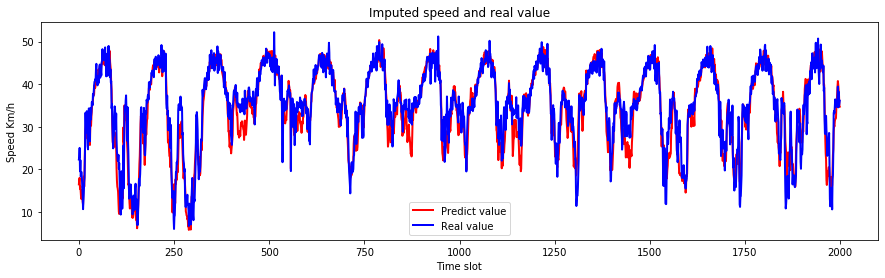

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 4))
road = 11
start_time = 0
end_time = 2000
plt.plot(test_mat_rec[road, start_time:end_time], label = 'Predict value', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=2)
plt.plot(test_ground_truth[road, start_time:end_time], label = 'Real value', marker='', markerfacecolor='blue', markersize=8, color='blue', linewidth=2)
plt.title('Imputed speed and real value')
plt.xlabel('Time slot')
plt.ylabel('Speed Km/h')
plt.legend()
plt.show()